In [1]:
import networkx as nx
import torch
import torch_geometric.datasets as datasets
from torch_geometric.utils import to_networkx
import subprocess
import matplotlib.pyplot as plt
import multiprocessing
from time import sleep
import os

In [3]:
# load .pt file
data = torch.load('data/ENDataset/MUTAG@G14.pt')
# data_2 = torch.load('data/ENZYMES@graphs_le5@undirected@induced.pt')
# examine if the two is the same
# for i in range(600):
#     if not torch.equal(data[i].edge_index, data_2[i].edge_index):
#         print(False)

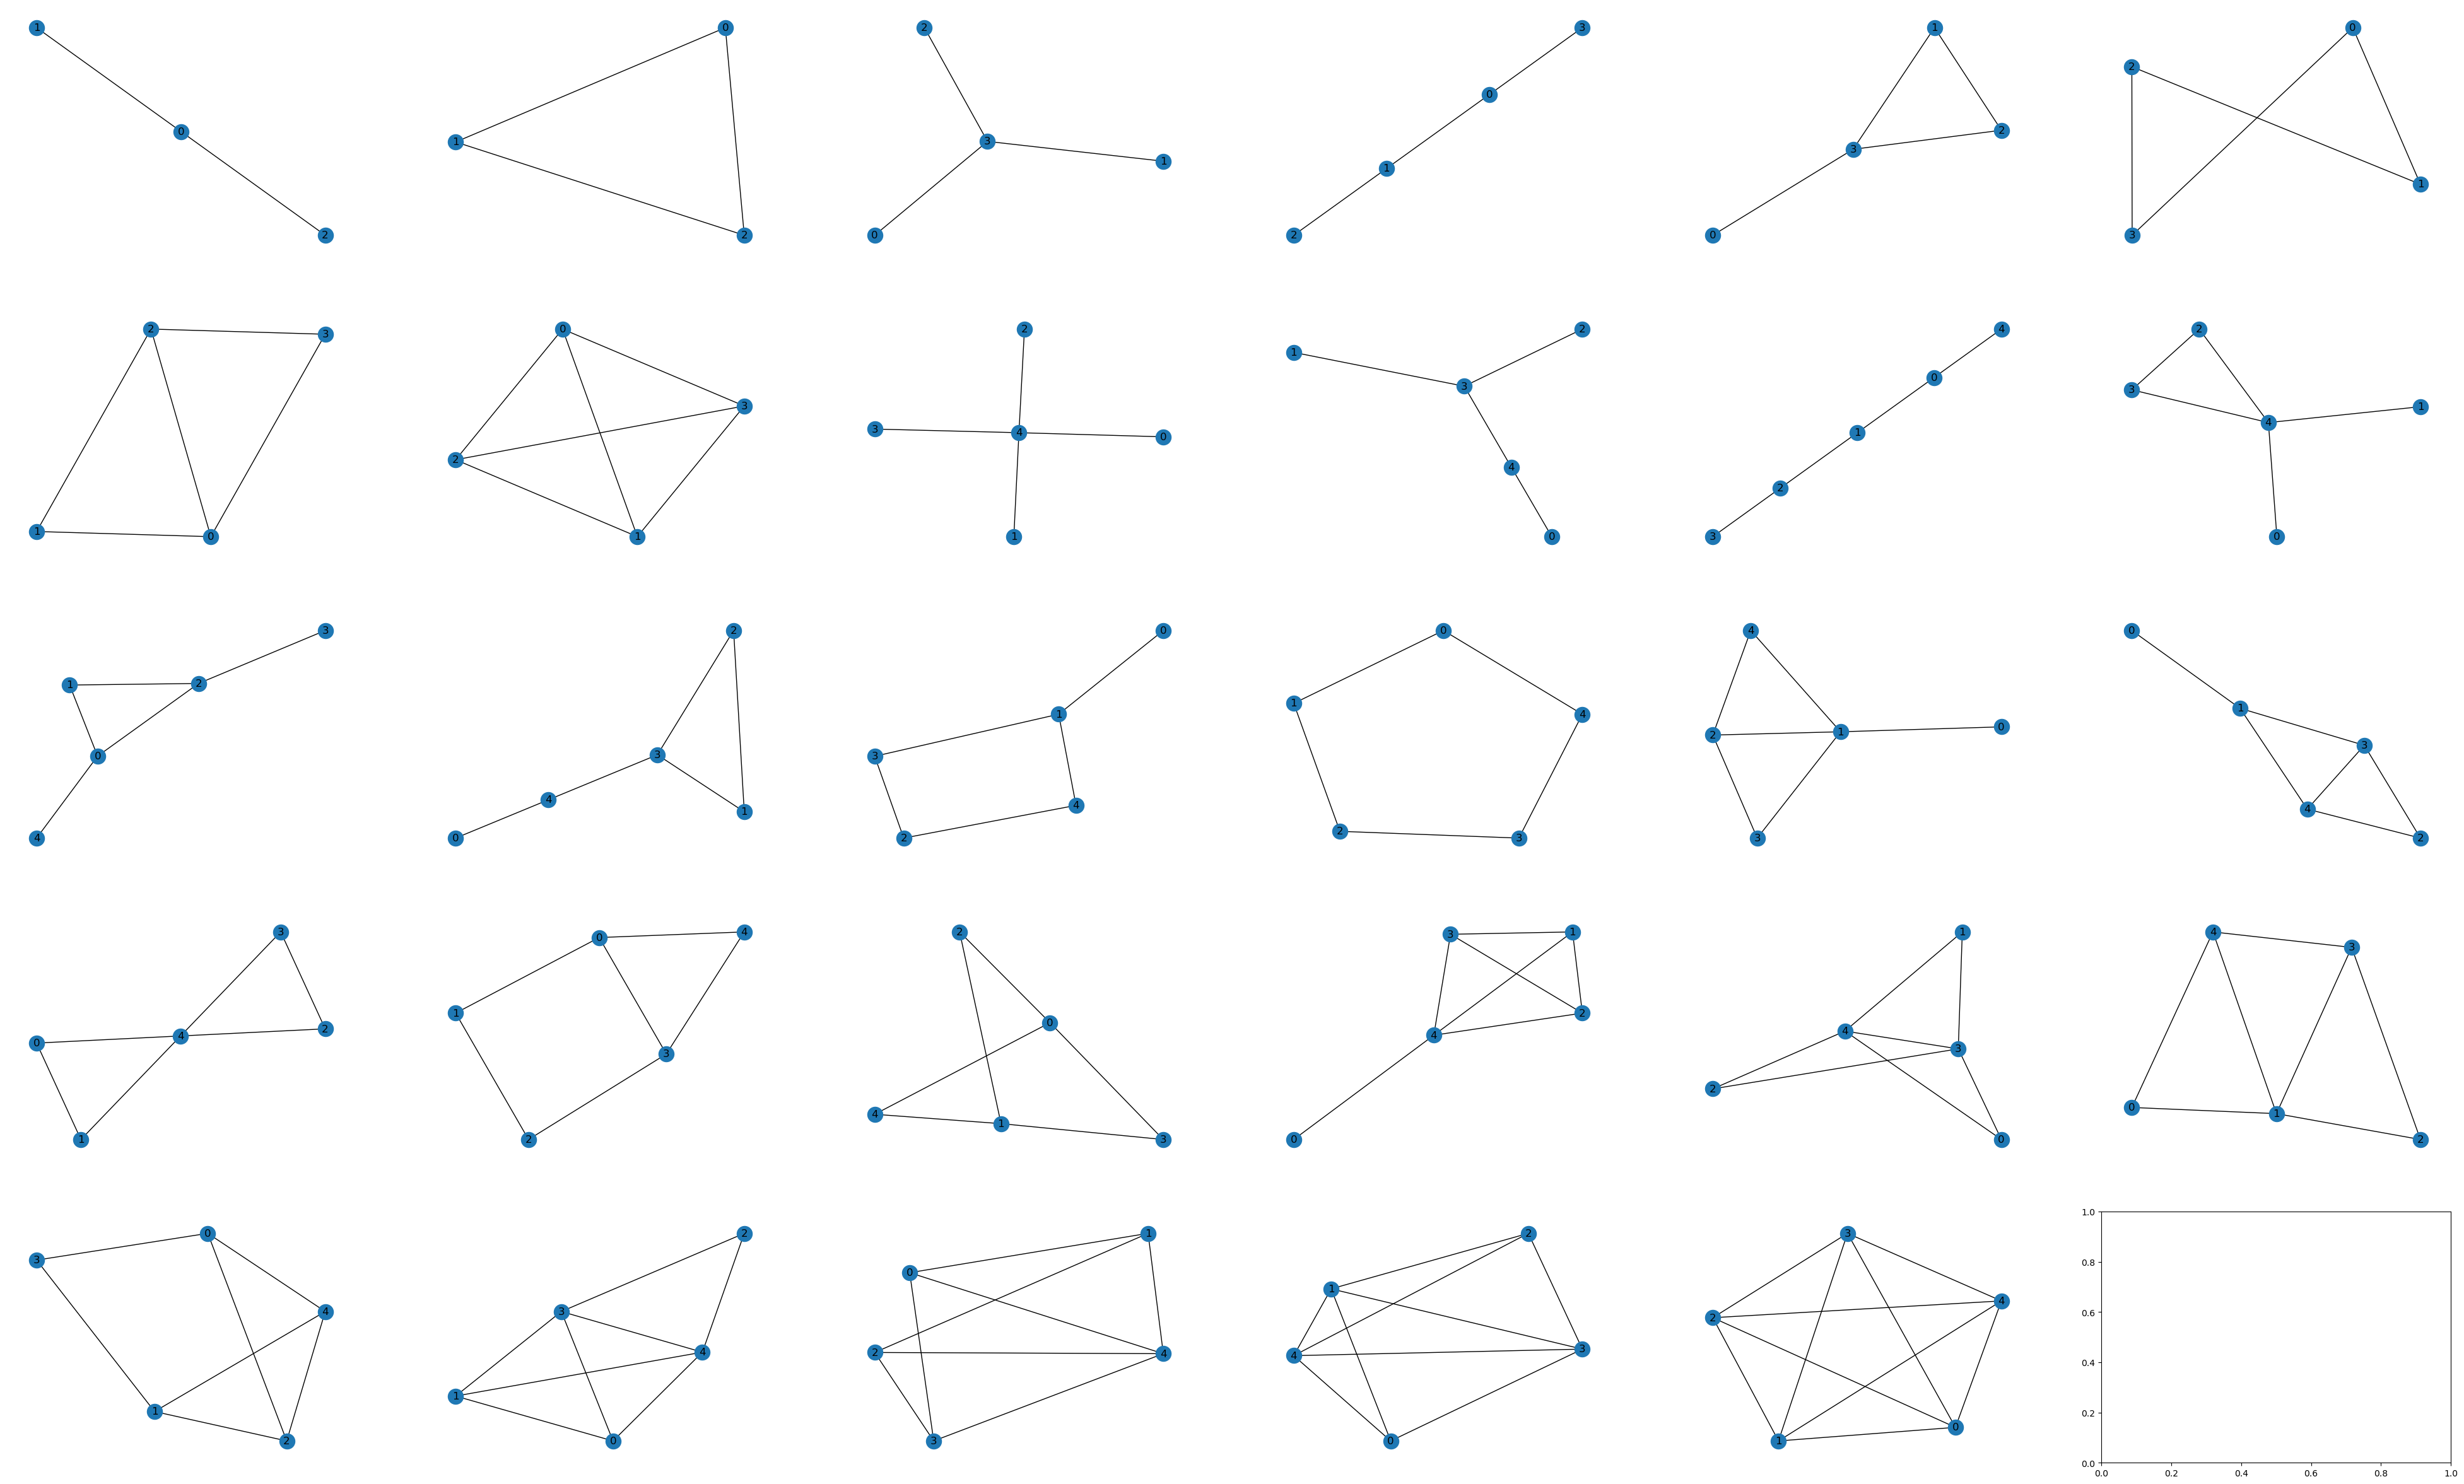

In [3]:
query_graphs = [nx.graph_atlas(index) for index in [6, 7] + list(range(13, 19)) + list(range(29, 32)) + list(range(34, 39)) + list(range(40, 53))]
fig, axs = plt.subplots(5, 6, figsize=(50, 30))
for qg in query_graphs:
   nx.draw(qg, with_labels=True, ax=axs.flat[query_graphs.index(qg)])

In [2]:
dataset = datasets.TUDataset(root='data/TUDataset', name='REDDIT-MULTI-5K')
# fig, axs = plt.subplots(6, 8, figsize=(36, 48))
# for i, d in enumerate(dataset[:48]):
#     nx.draw(to_networkx(d, to_undirected=True), with_labels=True, ax=axs.flat[i])

In [6]:
# sort the graphs in the dataset by number of nodes
dataset = sorted(dataset, key=lambda g: g.num_edges)

In [3]:
num_nodes = [g.num_nodes for g in dataset]
# num_nodes = sorted(num_nodes, reverse=True)
num_edges = [g.num_edges for g in dataset]
# num_edges = sorted(num_edges, reverse=True)

In [ ]:
def sub_process(i):
    sleep(1)
    return i+1

pool = multiprocessing.Pool(16)
result = pool.map(sub_process, range(16))

In [ ]:
print(multiprocessing.cpu_count())

In [ ]:
len(os.sched_getaffinity(0))

In [ ]:
from multiprocessing import Pool
from tqdm import tqdm

def worker(n):
    # This is your worker function where you put the logic of your program.
    return n * 2

if __name__ == "__main__":
    with Pool(processes=4) as pool:  # Choose the number of processes according to your needs
        result_list_tqdm = list(pool.imap(worker, tqdm(range(9999))))
        # result_list_tqdm = list(tqdm(pool.imap_unordered(worker, range(9999)), total=9999))
    
    print(result_list_tqdm[:100])
    print('Done!', flush=True)

In [ ]:
import concurrent.futures
from tqdm import tqdm
import multiprocessing


def worker(x, results):
    # Your function here
    res = x * x
    results[x] = res

inputs = range(99999)

with multiprocessing.Manager() as manager:
    results = manager.list([None]*len(inputs))
    with concurrent.futures.ProcessPoolExecutor() as executor:
        futures = [executor.submit(worker, x, results) for x in inputs]
        for _ in tqdm(concurrent.futures.as_completed(futures), total=len(futures)):
            pass

    results = list(results)
    print(results[:100])
